<a href="https://colab.research.google.com/github/sofiaborgato/DataScienceLab/blob/master/265348_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import wave as w
import scipy.io as sio
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt 
import scipy.signal as ss
import librosa.display 
import librosa
import IPython.display as ipd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from scipy.io import wavfile
from scipy.fftpack import fft
import csv
from pysndfx import AudioEffectsChain
import numpy as np
import math
import python_speech_features
import scipy as sp
from scipy import signal
import sox
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest

In [ ]:
headers=np.array([])
feature_df=pd.DataFrame(columns=headers)
eval_df=pd.DataFrame(columns=headers)
mfcc_chroma_header=np.array([])
mfcc_header=np.array([])

headers_nolabel=np.array([])
val=np.array([])
for i in range (0,40):
    headers=np.append(headers,"mfccs"+str(i+1)) 
    mfcc_chroma_header=np.append(mfcc_chroma_header,"mfccs"+str(i+1))
    headers_nolabel=np.append(headers_nolabel,"mfccs"+str(i+1))
mfcc_header=headers
for i in range(0,12):
    headers=np.append(headers,"chroma"+str(i+1)) 
    mfcc_chroma_header=np.append(mfcc_chroma_header,"chroma"+str(i+1))
    headers_nolabel=np.append(headers_nolabel,"chroma"+str(i+1))
headers=np.append(headers,"zero_crossing")
headers_nolabel=np.append(headers_nolabel,"zero_crossing")
headers=np.append(headers,"spectral_bandwidth")
headers_nolabel=np.append(headers_nolabel,"spectral_bandwidth")
headers=np.append(headers,"spectral_centroids")
headers_nolabel=np.append(headers_nolabel,"spectral_centroids")
headers=np.append(headers,"roll_off")
headers_nolabel=np.append(headers_nolabel,"roll_off")

headers=np.append(headers,"label")



val=headers_nolabel
val=np.append(val,"id")
print(val)
print(headers_nolabel)
feature_df=pd.DataFrame(columns=headers)
df_eval=pd.DataFrame(columns=val)
print(mfcc_chroma_header)

['mfccs1' 'mfccs2' 'mfccs3' 'mfccs4' 'mfccs5' 'mfccs6' 'mfccs7' 'mfccs8'
 'mfccs9' 'mfccs10' 'mfccs11' 'mfccs12' 'mfccs13' 'mfccs14' 'mfccs15'
 'mfccs16' 'mfccs17' 'mfccs18' 'mfccs19' 'mfccs20' 'mfccs21' 'mfccs22'
 'mfccs23' 'mfccs24' 'mfccs25' 'mfccs26' 'mfccs27' 'mfccs28' 'mfccs29'
 'mfccs30' 'mfccs31' 'mfccs32' 'mfccs33' 'mfccs34' 'mfccs35' 'mfccs36'
 'mfccs37' 'mfccs38' 'mfccs39' 'mfccs40' 'chroma1' 'chroma2' 'chroma3'
 'chroma4' 'chroma5' 'chroma6' 'chroma7' 'chroma8' 'chroma9' 'chroma10'
 'chroma11' 'chroma12' 'zero_crossing' 'spectral_bandwidth'
 'spectral_centroids' 'roll_off' 'id']
['mfccs1' 'mfccs2' 'mfccs3' 'mfccs4' 'mfccs5' 'mfccs6' 'mfccs7' 'mfccs8'
 'mfccs9' 'mfccs10' 'mfccs11' 'mfccs12' 'mfccs13' 'mfccs14' 'mfccs15'
 'mfccs16' 'mfccs17' 'mfccs18' 'mfccs19' 'mfccs20' 'mfccs21' 'mfccs22'
 'mfccs23' 'mfccs24' 'mfccs25' 'mfccs26' 'mfccs27' 'mfccs28' 'mfccs29'
 'mfccs30' 'mfccs31' 'mfccs32' 'mfccs33' 'mfccs34' 'mfccs35' 'mfccs36'
 'mfccs37' 'mfccs38' 'mfccs39' 'mfccs40' 'chro

In [ ]:

pathdev="/home/caprino/Desktop/DataScienceLab/development"
patheval="/home/caprino/Desktop/DataScienceLab/evaluation"


for folder in os.listdir(pathdev):
    print(pathdev)
    new_path = "/home/caprino/Desktop/DataScienceLab/development/" +folder
    
    for file in os.listdir(new_path):
        name = file.split(".")[0]
        data,sample_rate=librosa.load(new_path + "/" + file)
        chromagram = np.mean(librosa.feature.chroma_stft(data, sr = sample_rate).T,axis = 0)
        zero_crossings = np.sum(librosa.zero_crossings(data, pad=False), axis = 0)
        spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(data, sr = sample_rate).T, axis = 0)
        spectral_centroids = np.mean(librosa.feature.spectral_centroid(data, sr = sample_rate).T, axis = 0)
        S, phase = librosa.magphase(librosa.stft(data))
        rolloff = np.mean(librosa.feature.spectral_rolloff(S = S, sr = sample_rate).T, axis = 0)
        mfccs=np.mean(librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40).T ,axis=0)
        
        chroma=librosa.feature.chroma_stft(y=data,sr=sample_rate)
        sample_rate,data=wavfile.read(new_path + "/" + file)
        
        
        feature=np.hstack((mfccs,chromagram,zero_crossings,spectral_bandwidth,spectral_centroids,rolloff,folder)).reshape(1,57)
        feature_df=feature_df.append(pd.DataFrame(feature,columns=headers))
        
        
        


In [ ]:
#EvalData
patheval="/home/caprino/Desktop/DataScienceLab/evaluation"
for file_name in os.listdir(patheval):
    new_path_eval="/home/caprino/Desktop/DataScienceLab/evaluation/"+file_name
    name= file_name.split(".")[0]
    data,sample_rate=librosa.load(new_path_eval)
    chromagram = np.mean(librosa.feature.chroma_stft(data, sr = sample_rate).T,axis = 0)
    zero_crossings = np.sum(librosa.zero_crossings(data, pad=False), axis = 0)
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(data, sr = sample_rate).T, axis = 0)
    spectral_centroids = np.mean(librosa.feature.spectral_centroid(data, sr = sample_rate).T, axis = 0)
    S, phase = librosa.magphase(librosa.stft(data))
    rolloff = np.mean(librosa.feature.spectral_rolloff(S = S, sr = sample_rate).T, axis = 0)
    mfccs=np.mean(librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40).T ,axis=0)
    chroma=librosa.feature.chroma_stft(y=data,sr=sample_rate)
    
    feature=np.hstack((mfccs,chromagram,zero_crossings,spectral_bandwidth,spectral_centroids,rolloff,name)).reshape(1,57)
    df_eval=df_eval.append(pd.DataFrame(feature,columns=val))


In [ ]:
#To csv
path_csv="/home/caprino/Desktop/DataScienceLab/csv"
print(dev_data[0])

data=pd.DataFrame(dev_data)
data["label"]=dev_label



In [ ]:
#feature_df.to_csv("/home/caprino/Desktop/DataScienceLab/csv/FINAL.csv")
df_eval.to_csv("/home/caprino/Desktop/DataScienceLab/csv/EVAL_1.csv")

In [ ]:
#read from csv

path_csv="/home/caprino/Desktop/DataScienceLab/csv/FINAL.csv"
df_dev=pd.read_csv(path_csv)    
del df_dev['Unnamed: 0']   
path_csv_eval="/home/caprino/Desktop/DataScienceLab/csv/EVAL_1.csv"

df_eval=pd.read_csv(path_csv_eval)  

del df_eval['Unnamed: 0']

df_eval.head()


,mfccs1,mfccs2,mfccs3,mfccs4,mfccs5,mfccs6,mfccs7,mfccs8,mfccs9,mfccs10,...,chroma8,chroma9,chroma10,chroma11,chroma12,zero_crossing,spectral_bandwidth,spectral_centroids,roll_off,id
0,-317.88077,95.122826,13.304368,22.820816,20.186580,16.213732,5.515041,6.710335,-3.440964,-1.211509,...,0.248003,0.462112,0.780040,0.642662,0.518696,2727,2551.567973,1896.444306,4531.760476,f71caddf249f66e667379b457a90b50e0357ad149091f8...
1,-391.06628,44.939890,-4.588459,22.370453,7.971390,8.680753,-1.794312,7.728444,1.960706,4.096737,...,0.416558,0.407479,0.472268,0.612991,0.554580,2216,2941.687834,2970.540715,6612.650923,ff9896aae89b6d7f722283154b24b22e7e026779bc51db...
2,-283.19092,82.432710,8.451013,7.854715,3.924375,9.795157,-13.672332,-7.079937,-16.401867,-2.586668,...,0.457277,0.559316,0.447596,0.521547,0.702000,3025,2579.817489,2638.123661,5213.482111,deeaecb262e812efc48b06cf3370d2ce60c98d2386590e...
3,-280.03625,98.271965,-7.650848,21.957516,6.701251,-11.107894,-4.083050,1.936195,-26.172260,-10.708789,...,0.400671,0.383827,0.465903,0.484147,0.351485,2503,2378.484923,2045.745035,4189.186790,97f70bd9bf47744752e30ea7fb7419f1d9c09bc02561b9...
4,-245.28340,80.378610,-41.711610,13.029464,-0.732371,-27.038532,-10.226423,-9.867496,-40.156040,-4.149104,...,0.352171,0.555669,0.527880,0.269269,0.193265,1572,2116.466918,2168.194727,3649.388539,20c17a9219bed40af357e22d51cdf8d42d665407f88c6f...


In [ ]:
df_dev.head()
len(df_dev)

In [ ]:
#DATA EXPLORATION PLOT
path_dev="/home/caprino/Desktop/DataScienceLab/development"
length = np.array([])
for folder in os.listdir(path_dev):
    new_path = path_dev +"/"+folder
    for file in os.listdir(new_path):
        name = file.split(".")[0]
        l=librosa.get_duration(filename= new_path +  '/' + name + '.wav')
        length=np.append(length,l)
        

In [ ]:
#LENGTH EXPLORATION ON EVAL
patheval="/home/caprino/Desktop/DataScienceLab/evaluation"
eval_length=np.array([])
for file_name in os.listdir(patheval):
    name = file.split(".")[0]
    l=librosa.get_duration(filename="/home/caprino/Desktop/DataScienceLab/evaluation/"+file_name)
    eval_length=np.append(eval_length,l)
print(np.min(eval_length),np.max(eval_length),np.mean(eval_length))




In [ ]:
print(np.min(length),np.max(length),np.mean(length))
print(len(length))

In [ ]:
#REMOVE USELSS DATA, NEVER RUN MORE THAN ONE!!!!!
result=np.where(length>=0.45)

merda=pd.Series(result)

df_dev = df_dev.take(merda[0])

df_dev.head()

In [ ]:
mg=df_dev.describe(percentiles=[.25,.5,.75])
print(mg)
boxplot_mfccs = df_dev.boxplot(column=['mfccs10','mfccs20','mfccs30','mfccs40' ]) 
#boxplot = df_dev.boxplot(column=['chroma1','chroma3','chroma9','chroma12' ]) 
print(boxplot_mfccs)

In [ ]:
sns.set_theme(style="white")
sns.countplot('label', data=df_dev,palette="Set3")
plt.title('Label distribuition among the dataset', fontsize=14)
plt.show()

In [ ]:
#NOISE REDUCTION ON MFCCS


data_test,sample_rate_test=librosa.load("/home/caprino/Desktop/DataScienceLab/cazzo.wav")
mfcc=librosa.feature.mfcc(data_test,n_mfcc=40)
print(data_test)
def reduce_noise_mfcc_down(y,mfcc,sr):

    hop_length = 512

    ## librosa
    #mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=40)
    librosa.mel_to_hz(y)

    ## mfcc
    #mfcc = python_speech_features.base.mfcc(y)
    #mfcc = python_speech_features.base.logfbank(y)
    #mfcc = python_speech_features.base.lifter(mfcc)

    sum_of_squares = []
    index = -1
    for r in mfcc:
        sum_of_squares.append(0)
        index = index + 1
        for n in r:
            sum_of_squares[index] = sum_of_squares[index] + n**2

    strongest_frame = sum_of_squares.index(max(sum_of_squares))
    hz = python_speech_features.base.mel2hz(mfcc[strongest_frame])

    max_hz = max(hz)
    min_hz = min(hz)

    speech_booster = AudioEffectsChain().highshelf(frequency=min_hz*(-1)*1.2, gain=-12.0, slope=0.6).limiter(gain=8.0)
    y_speach_boosted = speech_booster(y)

    return (y_speach_boosted)

y=reduce_noise_mfcc_down(data_test,mfcc,sample_rate_test)
print(y)

In [ ]:
#COLLECT DENOISED DATA
df_cleaned=pd.DataFrame()
i=0
pathdev="/home/caprino/Desktop/DataScienceLab/development"
for folder in os.listdir(pathdev):
    print(pathdev)
    new_path = "/home/caprino/Desktop/DataScienceLab/development/" + folder
    
    for file in os.listdir(new_path):
        mfccs=df_dev.iloc[i].loc[mfcc_header]
        print(mfccs)
        name = file.split(".")[0]
        y,sr=librosa.load(new_path + "/" + file)
        print(new_path + "/" + file)
        cleaned=reduce_noise_mfcc_down(y,mfccs,sr)
        cleaned=cleaned.reshape(1,len(cleaned))
        df_cleaned=df_cleaned.append(pd.DataFrame(cleaned))
        i+=1


In [ ]:
df_cleaned.to_csv("/home/caprino/Desktop/DataScienceLab/csv/cleaned.csv")

In [ ]:
#NORMALIZE AMPLITUDE
pathdev="/home/caprino/Desktop/DataScienceLab/development"
patheval="/home/caprino/Desktop/DataScienceLab/evaluation"
time=[None]*24449
label=[None]*24449
i=0
SR=[None]*24449

for folder in os.listdir(pathdev):
    print(pathdev)
    new_path = "/home/caprino/Desktop/DataScienceLab/development/" +folder
    
    for file in os.listdir(new_path):
        name = file.split(".")[0]
        sr, data = wavfile.read(new_path + "/" + file)
        time[i]=data
        label[i]=folder
        SR[i]=sr
        i+=1
        


In [ ]:
def plot_audio_samples(X):
    lengths = []
    fig, ax = plt.subplots(1,1,figsize=(12,8))

    for idx in range(0, len(X), 10):
        ax.plot(X[idx], alpha=0.5)
        lengths.append(len(time[idx]))


    # To show time on the x axes
    ax.set_xticks(np.arange(0, max(lengths), 500))
    ax.set_xticklabels([sample/SR for sample in np.arange(0, max(lengths), 500)])
    return ax


In [ ]:
def normalize_data(X):
    return [zscore(x) for x in X]

time = normalize_data(time)



In [ ]:
ax = plot_audio_samples(time)
ax.set_ylabel("Amplitude")
ax.set_xlabel("Time [s]")
ax.set_title("Multiple audio samples")
plt.show()

24216


Text(0, 0.5, 'Variance explained')

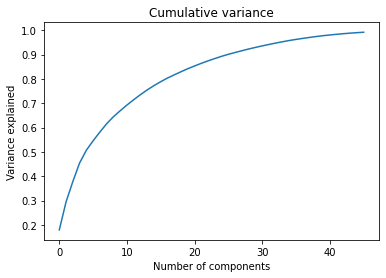

In [ ]:
#DATA EXPLORATION
from sklearn.utils import shuffle
df_dev=shuffle(df_dev)
#df_dev = df_dev.sample(frac = 1)
#outlier detection
#clf = IsolationForest(random_state=42)
lf = LocalOutlierFactor(n_neighbors=20)#,metric='cosine')
#lf=EllipticEnvelope()
X=lf.fit_predict(df_dev[headers_nolabel])
res=np.where(X==1)
to_keep=pd.Series(res)
df_dev_noutliers=pd.DataFrame()
df_dev_noutliers=df_dev.take(to_keep[0])
print(len(df_dev_noutliers))

#PREPROCESSING

#STANDARDSCALER
#n=StandardScaler()
#n=RobustScaler()
n=PowerTransformer()

#scaled_dev = scaler.fit_transform(df_dev_noutliers[mfcc_chroma_header])
scaled_dev = n.fit_transform(df_dev_noutliers[headers_nolabel])
#scaled_eval=scaler.transform(df_eval[mfcc_chroma_header])
scaled_eval = n.fit_transform(df_eval[headers_nolabel])
#PCA
#kbest = SelectKBest( k=45).fit(scaled_dev, df_dev_noutliers['label'])
#pca_dev = kbest.transform(scaled_dev)
#pca_eval = kbest.transform(scaled_eval)
PCA_dev = PCA(.99).fit(scaled_dev)
pca_dev = PCA_dev.transform( scaled_dev)
pca_eval = PCA_dev.transform(scaled_eval)

explained_pca = np.cumsum(PCA_dev.explained_variance_ratio_)
#Plotting cumulative variance
plt.plot(explained_pca)
plt.title('Cumulative variance')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')


In [ ]:
#Random Forest Predict EVAL
criterion=['gini', 'entropy']

param_grid ={}
X_train, X_test, y_train, y_test = train_test_split(pca_dev, df_dev_noutliers['label'], test_size=0.4, random_state=42)
rf=RandomForestClassifier(max_features = 'sqrt')






0.9301284205385242


In [ ]:
#SVM
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(pca_dev, df_dev_noutliers['label'], test_size=0.2, random_state=42)
svm_check =svm.SVC(kernel = 'rbf',random_state=42,C=10,gamma=0.1)
print(metrics.f1_score(svm_check.fit(X_train, y_train).predict(X_test), y_test,average='macro'))
print(svm_check.get_params())


In [ ]:
def build_classifier(X_train, y_train, X_test, y_test, clf_to_evaluate, scores, param_grid, n_folds=3 ):
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(clf_to_evaluate, param_grid, cv=n_folds,
                       scoring=score, verbose=True, n_jobs=4, iid=False)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    return clf

In [ ]:
from sklearn import svm
score = 'f1_macro'
C=[0.01,0.1,1,10,100]
gamma=[0.001,0.01,0.1,0.0001]
kernel='rbf'
param_grid = {'C':C,
               'gamma':gamma,
    
            }
scores = 'f1_macro'
X_train, X_test, y_train, y_test = train_test_split(pca_dev, df_dev_noutliers['label'], test_size=0.4, random_state=42)
clf_to_evaluate=svm.SVC(kernel='rbf')

best_clf=build_classifier(X_train, y_train, X_test, y_test, clf_to_evaluate, scores, param_grid, n_folds=5 )

# Tuning hyper-parameters for f1_macro

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  8.6min finished
/home/caprino/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Best parameters set found on development set:

{'C': 10, 'gamma': 0.01}

Grid scores on development set:

0.138 (+/-0.010) for {'C': 0.01, 'gamma': 0.001}
0.809 (+/-0.013) for {'C': 0.01, 'gamma': 0.01}
0.030 (+/-0.005) for {'C': 0.01, 'gamma': 0.1}
0.019 (+/-0.000) for {'C': 0.01, 'gamma': 0.0001}
0.846 (+/-0.009) for {'C': 0.1, 'gamma': 0.001}
0.943 (+/-0.009) for {'C': 0.1, 'gamma': 0.01}
0.594 (+/-0.017) for {'C': 0.1, 'gamma': 0.1}
0.190 (+/-0.016) for {'C': 0.1, 'gamma': 0.0001}
0.940 (+/-0.005) for {'C': 1, 'gamma': 0.001}
0.973 (+/-0.006) for {'C': 1, 'gamma': 0.01}
0.926 (+/-0.007) for {'C': 1, 'gamma': 0.1}
0.849 (+/-0.009) for {'C': 1, 'gamma': 0.0001}
0.965 (+/-0.003) for {'C': 10, 'gamma': 0.001}
0.978 (+/-0.005) for {'C': 10, 'gamma': 0.01}
0.929 (+/-0.008) for {'C': 10, 'gamma': 0.1}
0.937 (+/-0.006) for {'C': 10, 'gamma': 0.0001}
0.969 (+/-0.004) for {'C': 100, 'gamma': 0.001}
0.976 (+/-0.007) for {'C': 100, 'gamma': 0.01}
0.929 (+/-0.008) for {'C': 100, 'gamma': 0.1}
0

In [ ]:
#RESULT
svm_eval=svm.SVC(C=10,gamma=0.01,kernel='rbf')
svm_eval=svm_eval.fit(pca_dev,df_dev_noutliers['label'])
result=svm_eval.predict(pca_eval)
dfSVM=pd.DataFrame()

dfSVM['Id']=df_eval['id']
dfSVM['Predicted'] = result
dfSVM[['Id','Predicted']].to_csv("/home/caprino/Desktop/DataScienceLab/csv/resul_18.csv",index=False)
print(dfSVM)

In [ ]:
#SOME PLOT
#MFCCS
import matplotlib.pyplot as plt

file_name="/home/caprino/Desktop/DataScienceLab/development/a/0a11a5b8bb29773643555e1de0bbd3f5a3d6b53fb52fb765a7092e3f63109cf8.wav"
data,sr=librosa.load(file_name)
mfccs=librosa.feature.mfcc(y=data,sr=sr,n_mfcc=40)
fig, ax = plt.subplots()

img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)

fig.colorbar(img, ax=ax)

ax.set(title='MFCC')




In [ ]:
#CHROMAGRAM
file_name="/home/caprino/Desktop/DataScienceLab/development/a/0a11a5b8bb29773643555e1de0bbd3f5a3d6b53fb52fb765a7092e3f63109cf8.wav"
file_name="/home/caprino/Desktop/DataScienceLab/development/a/0a11a5b8bb29773643555e1de0bbd3f5a3d6b53fb52fb765a7092e3f63109cf8.wav"
data,sr=librosa.load(file_name)
chromagram = librosa.feature.chroma_stft(data, sr = sr)

fig, ax = plt.subplots() 

librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time', ax=ax)

ax.set(title='chroma_stft')

ax.label_outer()




fig.colorbar(img, ax=ax)


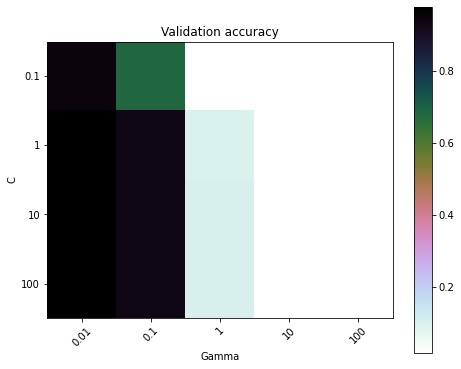

array([[0.94480492, 0.68416065, 0.01810159, 0.01810159, 0.01810159],
       [0.97254914, 0.93268504, 0.09316753, 0.02006755, 0.02006755],
       [0.97731565, 0.934958  , 0.10253918, 0.02006755, 0.02006755],
       [0.97545667, 0.934958  , 0.10253918, 0.02006755, 0.02006755]])

In [ ]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(pca_dev, df_dev_noutliers['label'], test_size=0.4, random_state=42)

C=[0.1,1,10,100]
Gamma=[0.01,0.1,1,10,100]
acc=[]
for c in C:
    for g in Gamma:
        svm=SVC(C=c,gamma=g,kernel='rbf')
        model=svm.fit(X_train,y_train)
        pred=svm.predict(X_test)
        accuracy=metrics.f1_score(y_test,pred,average='macro')
        acc.append(accuracy)
        stringa="C="+str(c)+",GAMMA="+str(g)+",accuracy_score="+str(accuracy)
        #plot_decision_boundaries(X_train,Y_train,model,stringa)


acc = np.array(acc).reshape(len(C), len(Gamma))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(acc, interpolation='nearest', cmap='cubehelix_r')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(Gamma)), Gamma, rotation=45)
plt.yticks(np.arange(len(C)), C)
plt.title('Validation accuracy')
plt.show()
acc  
        

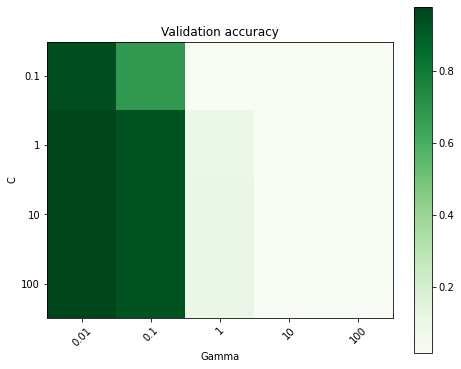

array([[0.94480492, 0.68416065, 0.01810159, 0.01810159, 0.01810159],
       [0.97254914, 0.93268504, 0.09316753, 0.02006755, 0.02006755],
       [0.97731565, 0.934958  , 0.10253918, 0.02006755, 0.02006755],
       [0.97545667, 0.934958  , 0.10253918, 0.02006755, 0.02006755]])

In [ ]:
acc = np.array(acc).reshape(len(C), len(Gamma))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(acc, interpolation='nearest',cmap='Greens')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(Gamma)), Gamma, rotation=45)
plt.yticks(np.arange(len(C)), C)
plt.title('Validation accuracy')
plt.show()
acc  

In [ ]:

def plot_decision_boundaries(X_train,Y_train,model,stringa):

    h=0.07
    cmap_light = ListedColormap(['gold', 'mediumturquoise', 'salmon'])

    cmap_bold = ListedColormap(['orange', 'teal', 'orangered'])

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold,
                edgecolor='k', s=70)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(stringa)

    plt.show()

In [ ]:
#PLOT CONFUSION MATRIX
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(clf, X_test, y_test, cmap = plt.cm.Greys, ax = ax) 
plt.show()
